In [1]:
#Importing Libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn.model_selection import LeaveOneOut, cross_val_score
from numpy import mean
import warnings


warnings.filterwarnings("ignore")

In [2]:
# locate the directory
DIRECTORY = "/home/akira/MoBI/cpcst_hopkins/"
arr = os.listdir(DIRECTORY)

In [3]:
def pre_process(subject,size):
    # The list of columns to be dropped
    drop_ls = [
    "expected_time",
    "flip_time",
    "stim_pos",
    "user_pos",
    "lambda_val",
    "change_rate_x",
    ]
    loo = LeaveOneOut()
    # the feature matrix in array form
    X = subject.drop(columns=drop_ls).to_numpy()
    #print("The shape of X:", X.shape)
    y_pos_dif = (subject["user_pos"].to_numpy() - subject["stim_pos"].to_numpy())
    y = y_pos_dif
    X_train, X_test, y_train, y_test = train_test_split(X[:size], y[:size], test_size=0.2, random_state=23)  # only 100 samples are used here
    #X_train = loo.split(X[:size])
    #X_test = ~
    #y_train = loo.split(y[:size])
    #y_test = ~
    return X_train, X_test, y_train, y_test

In [4]:
def model_ridge(X_train, X_test, y_train, y_test):
    loo = LeaveOneOut()
    rr = Ridge(random_state=23)
    return mean(cross_val_score(rr, X_train, y_train, scoring='neg_mean_absolute_error', cv=loo, n_jobs=-1))

In [5]:
#writing for one subject 
subject = pd.read_csv(DIRECTORY + arr[0])
temp1 = pd.read_csv(DIRECTORY + arr[1])
temp2 = pd.read_csv(DIRECTORY + arr[2])
frames = [subject, temp1, temp2]
result = pd.concat(frames)


In [6]:
rows,columns = subject.shape
rows

17790

In [7]:
X_train, X_test, y_train, y_test = pre_process(subject, rows)
X_train

array([[ 7.09945219e-01,  5.31389045e+02,  8.48242728e+01, ...,
         4.80950561e-02, -3.55096564e-03, -1.58303125e-02],
       [ 7.04949336e-01,  5.52188086e+02,  8.44763463e+01, ...,
         5.19925331e-02,  2.31390376e-03,  1.09090597e-02],
       [ 6.94544305e-01,  3.79118702e+02,  8.60599346e+01, ...,
         5.28251023e-02,  1.61086001e-03,  1.43119579e-02],
       ...,
       [ 6.95982946e-01,  3.79686252e+02,  8.58114275e+01, ...,
         1.88167577e-02, -6.63076718e-03,  4.91648877e-02],
       [ 6.86427886e-01,  3.15119086e+02,  8.54874856e+01, ...,
         8.87618927e-02,  3.54264797e-03,  2.45748395e-02],
       [ 7.05570355e-01,  2.99461381e+02,  8.54203558e+01, ...,
         1.68150910e-02,  4.07623008e-04, -6.06977089e-03]])

In [8]:
val = model_ridge(X_train, X_test, y_train, y_test)

In [9]:
val

np.float64(-0.029519217164631864)

In [10]:
scores=[]
sub_plot=[]
for i in range(0,61):
    subject = pd.read_csv(DIRECTORY + arr[i])
    rows,columns = subject.shape
    X_train, X_test, y_train, y_test = pre_process(subject, rows)
    val = model_ridge(X_train, X_test, y_train, y_test)
    sub_plot.append(i+1)
    scores.append(val)

In [11]:
scores

[np.float64(-0.029519217164631864),
 np.float64(-0.15608178939403045),
 np.float64(-0.010818046887318893),
 np.float64(-0.06839591852616815),
 np.float64(-0.015821551300340537),
 np.float64(-0.028865681684626932),
 np.float64(-0.01924491033878995),
 np.float64(-0.028548564465717956),
 np.float64(-0.007833292575101817),
 np.float64(-0.009316876011579584),
 np.float64(-0.05623600037531418),
 np.float64(-0.01743990253602488),
 np.float64(-0.020659662414057336),
 np.float64(-0.031059948512458108),
 np.float64(-0.02788896852684411),
 np.float64(-0.011984960489012935),
 np.float64(-0.009839678581342026),
 np.float64(-0.020901646178442434),
 np.float64(-0.008207002516914495),
 np.float64(-0.05283704272138231),
 np.float64(-0.04645794260692926),
 np.float64(-0.012221845217164275),
 np.float64(-0.02230749235177692),
 np.float64(-0.015477305303236844),
 np.float64(-0.017937981506765573),
 np.float64(-0.024779033823397273),
 np.float64(-0.03225371368014248),
 np.float64(-0.018538720291979366),
 n

In [12]:
sub_plot

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61]

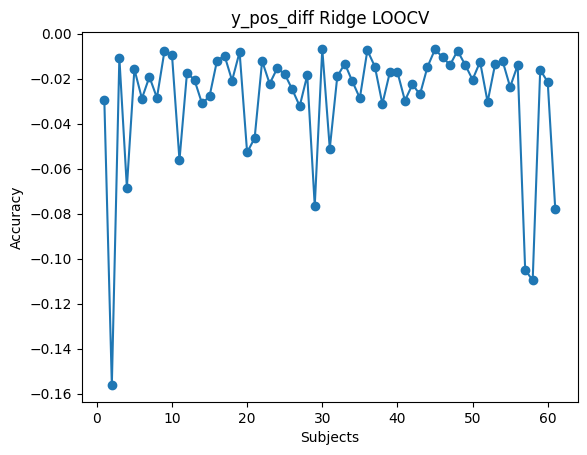

In [14]:
x = np.array(sub_plot)
y = np.array(scores)
plt.plot(x, y, '-o')
plt.title("y_pos_diff Ridge LOOCV")
plt.xlabel("Subjects")
plt.ylabel("Accuracy")

plt.show()